 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>══════════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 3. Pandas & Matplotlib**
# Section 8. Pandas 와 Matplotlib을 활용한 데이터 분석 

### _Objective_
1. *앞서 배운 Pandas와 Matplotlib을 실제 데이터에서 어떻게 사용하는지 확인해봅시다.*
1. *실제 통계청의 데이터를 활용하여, 데이터를 분석하는 실습 시간을 가져봅니다.* 

╚═══════════════════════════════════════════════╝

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt  

import pandas as pd
import numpy as np

### [Optional. 시각화에서 한글 사용하기]

---

In [2]:
# 1. 나눔 폰트를 다운받기
!apt-get update -qq
!apt-get install fonts-nanum* -qq

/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found


In [3]:
import matplotlib.font_manager as fm
# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# \[ 최근 주요 사망원인 별 사망률 데이터 분석 \]
---

---

> * 출처 : [kosis - 조사망률 정보](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1012) <br>
> * _기간 : 2008 ~ 2017년_ <br>
> * _지표 : 조사망률, (단위 : 인구 10만명 당 명)_ <br>
> * _사망원인 : 전체, 신생물, 내분비 및 대사성질환, 순환기계통의 질환 등 20가지 카테고리로 나뉨_


<br>

## 1. Pandas를 통해 데이터를 읽어오기

---


### (1) pandas를 통한 데이터 읽어오기 

아래와 같은 방식으로, csv 파일을 읽어올 수 있습니다.

In [4]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/5days-for-deeplearning/%E1%84%8C%E1%85%A9%E1%84%89%E1%85%A1%E1%84%86%E1%85%A1%E1%86%BC%E1%84%85%E1%85%B2%E1%86%AF.csv

--2019-03-20 23:20:18--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/5days-for-deeplearning/%E1%84%8C%E1%85%A9%E1%84%89%E1%85%A1%E1%84%86%E1%85%A1%E1%86%BC%E1%84%85%E1%85%B2%E1%86%AF.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.8
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1424 (1.4K) [text/csv]
Saving to: ‘조사망률.csv.1’

조사망률.csv. 100%[===================>]   1.39K  --.-KB/s    in 0s      

2019-03-20 23:20:19 (28.3 MB/s) - ‘조사망률.csv.1’ saved [1424/1424]



In [5]:
df = pd.read_csv("./조사망률.csv",index_col=0)

### (2) pandas로 빠르게 데이터 살펴보기

`pandas`에서는 아래와 같이 표의 형태로 데이터를 가져오게 됩니다.

In [6]:
df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전체,498.2,497.3,512.0,513.6,530.8,526.6,527.3,541.5,549.4,557.3
신생물,141.4,142.5,146.6,145.0,149.0,151.5,153.5,153.6,156.0,156.8
- 각종 암,139.5,140.5,144.4,142.8,146.5,149.0,150.9,150.8,153.0,153.9
* 위암,20.9,20.4,20.1,19.4,18.6,18.2,17.6,16.7,16.2,15.7
* 간암,22.9,22.6,22.5,21.8,22.5,22.6,22.8,22.2,21.5,20.9
* 폐암,29.9,30.0,31.3,31.7,33.1,34.0,34.4,34.1,35.1,35.1
내분비 및 대사성질환,22.4,21.3,22.3,23.4,24.9,23.4,22.9,22.9,21.6,20.6
- 당뇨병,20.7,19.6,20.7,21.5,23.0,21.5,20.7,20.7,19.2,17.9
순환기계통의 질환,112.3,109.2,112.5,113.5,117.1,113.1,113.9,116.9,118.1,119.6
- 고혈압성 질환,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3


In [7]:
# 열 별 요약 정보는 다음과 같습니다
df.describe()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,65.740000,65.870000,67.730000,67.945000,69.980000,69.335000,69.590000,71.075000,71.785000,72.625000
std,109.680562,109.464943,112.683881,112.827383,116.513164,115.908377,116.199071,119.059127,120.943664,122.678256
min,9.600000,9.600000,9.600000,10.100000,10.400000,9.400000,10.000000,9.900000,10.100000,9.800000
25%,19.250000,18.300000,18.800000,18.850000,20.025000,20.600000,19.925000,19.700000,18.450000,17.350000
50%,24.450000,26.300000,26.850000,27.550000,26.500000,25.950000,25.500000,27.700000,28.900000,29.700000
75%,57.800000,55.450000,56.250000,54.200000,54.850000,53.050000,53.750000,55.825000,57.675000,61.075000
max,498.200000,497.300000,512.000000,513.600000,530.800000,526.600000,527.300000,541.500000,549.400000,557.300000


In [8]:
# 행 별 요약 정보는 아래와 같이 확인할 수 있습니다.
df.T.describe()

,전체,신생물,- 각종 암,* 위암,* 간암,* 폐암,내분비 및 대사성질환,- 당뇨병,순환기계통의 질환,- 고혈압성 질환,- 심장 질환,- 뇌혈관 질환,호흡기계통의 질환,- 폐렴,- 만성하기도 질환,소화기계통의 질환,- 간 질환,사망의 외부요인,- 운수사고,- 자살
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,525.400000,149.590000,147.13000,18.380000,22.230000,32.870000,22.570000,20.550000,114.620000,10.050000,51.420000,50.020000,45.670000,22.040000,14.230000,22.470000,13.540000,60.33000,12.220000,28.020000
std,20.372312,5.535632,5.16657,1.821965,0.639531,2.000583,1.227509,1.400198,3.190193,0.581664,5.504907,3.567072,10.346019,8.727504,0.689686,0.694502,0.408792,4.48604,1.729997,2.568527
min,497.300000,141.400000,139.50000,15.700000,20.900000,29.900000,20.600000,17.900000,109.200000,9.400000,43.400000,44.400000,32.400000,11.100000,13.200000,21.500000,13.100000,53.00000,9.800000,24.300000
25%,512.400000,145.400000,143.20000,16.925000,21.900000,31.400000,21.775000,19.875000,112.650000,9.600000,47.625000,48.050000,37.775000,15.475000,13.900000,22.125000,13.300000,56.82500,10.975000,26.125000
50%,526.950000,150.250000,147.75000,18.400000,22.500000,33.550000,22.650000,20.700000,113.700000,9.950000,51.300000,50.500000,44.850000,20.950000,14.050000,22.300000,13.450000,61.50000,12.250000,27.700000
75%,538.825000,153.575000,150.87500,19.925000,22.600000,34.325000,23.275000,21.300000,117.050000,10.325000,54.825000,51.775000,52.850000,27.600000,14.650000,22.850000,13.725000,64.00000,13.500000,30.375000
max,557.300000,156.800000,153.90000,20.900000,22.900000,35.100000,24.900000,23.000000,119.600000,11.300000,60.200000,56.500000,63.700000,37.800000,15.600000,23.700000,14.500000,65.80000,14.700000,31.700000


## 2. 데이터 탐색하기(EDA)

---

+ `pandas`로 읽어온 데이터를 `numpy`와 `matplotlib`을 활용하여 시각화하고 분석해 보도록 하겠습니다.<br>
+ 탐색적 데이터 분석(EDA ;  Exploratory Data Analysis)이라고 불리는 이 과정을 통해 데이터를 이해하고, 분석 인사이트를 발굴할 수 있습니다.

### 예제 1) 10년간 전체 조사망률 추세

위의 데이터를 통한 전체 조사망률 표는 아래와 같습니다.

| 연도 | 2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|조사망률| 498.2|497.3|512.|513.6|530.8|526.6|527.3|541.5|549.4|557.3|

<br>
> 시점에 따른 추세를 확인하는 데에는 꺽은선 그래프 시각화(plot)가 유용합니다. 

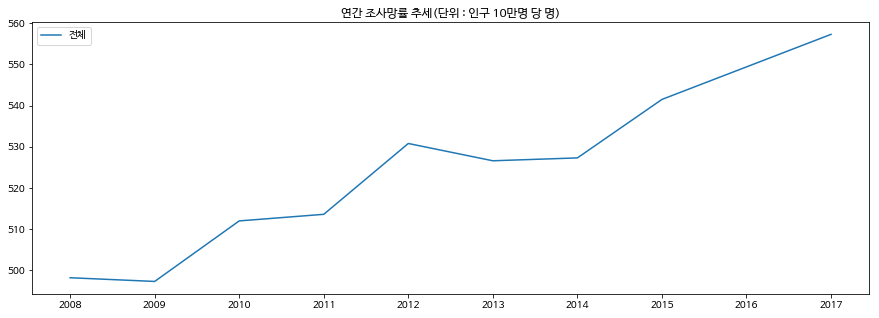

In [9]:
df.T.plot(y="전체",
          title="연간 조사망률 추세(단위 : 인구 10만명 당 명)",
          xticks=np.arange(len(df.columns)),
          figsize=(15,5))
plt.show()

국내 조사망자률은 꾸준히 증가하고 있습니다. 주요 원인들을 파악하여 나누어 볼 필요가 있습니다.

### 예제 2) 2017년 순환기계통 질환의 비율
위 데이터를 통한 순환기계통에 대한 조사망률 표는 다음과 같습니다. 

<br>

+ 순환기 계통의 사망 원인 중 제일 큰 비중을 차지하는 3가지는 아래와 같이, 고혈압성 질환, 심장 질환, 뇌혈관 질환이 있습니다.

<br>

|   |2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 |
|---|---|---|---|---|---|---|---|---|---|---|
|순환기계통의 질환| 112.3| 109.2| 112.5| 113.5| 117.1| 113.1| 113.9| 116.9| 118.1| 119.6|
|- 고혈압성 질환| 9.6| 9.6| 9.6| 10.1| 10.4| 9.4| 10.0| 9.9| 10.6| 11.3|
|- 심장 질환| 43.4| 45.0| 46.9| 49.8| 52.5| 50.2| 52.4| 55.6| 58.2| 60.2|
|- 뇌혈관 질환| 56.5| 52.0| 53.2| 50.7| 51.1| 50.3| 48.2| 48.0| 45.8| 44.4|

+ 순환기계통의 질환 중 각 질환이 차지하는 사망률의 비중을 확인하기 위해서는 <br>
   순환기계통의 질환에 속한 각 질환들의 사망률 합이 전체 순환기계통의 질환 사망률과 같아야 합니다.
+ 전체 순환기계통 질환 사망률에서 (고혈압성 질환, 심장 질환, 뇌혈관 질환)의 사망률을 빼주면 "기타 순환기계통 질환 사망률"을 알 수 있습니다.

In [10]:
cardiovascular_df = df.iloc[8:12].copy() # 순환기 계통 질환에 대한 데이터만 추출
cardiovascular_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
순환기계통의 질환,112.3,109.2,112.5,113.5,117.1,113.1,113.9,116.9,118.1,119.6
- 고혈압성 질환,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3
- 심장 질환,43.4,45.0,46.9,49.8,52.5,50.2,52.4,55.6,58.2,60.2
- 뇌혈관 질환,56.5,52.0,53.2,50.7,51.1,50.3,48.2,48.0,45.8,44.4


In [11]:
total = cardiovascular_df.iloc[0] # 전체 순환기계통의 질환
top3 = cardiovascular_df.iloc[1:4].sum(axis=0) # top3의 순환기계통 질환 사망률 합계(고혈압성 질환, 심장 질환, 뇌혈관 질환)
other = total - top3 # top3 순환기계통이 아닌 사망률 ( 기타 순환기계통 질환 사망률 )
other # 기타 사망률

2008    2.8
2009    2.6
2010    2.8
2011    2.9
2012    3.1
2013    3.2
2014    3.3
2015    3.4
2016    3.5
2017    3.7
dtype: float64

이에 따라, "기타 순환기계통 질환 사망률"은 아래와 같습니다.

|   |2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 |
|---|---|---|---|---|---|---|---|---|---|---|
|기타 질환| 2.8 | 2.6 | 2.8 | 2.9 | 3.1 | 3.2 | 3.3 | 3.4 | 3.5 | 3.7 |

+ "기타 순환기계통 질환 사망률"과 "3대 순환기계통 질환 사망률"의 비중을 확인해보도록 하겠습니다. (총 네가지 순환기계통 질환)
+ 총 네가지 순환기계통 질환의 사망률이 각각 차지하는 비중을 확인하기 위해 두개의 array로 나누어져있는 데이터를 하나로 합쳐줍니다.

In [12]:
cardiovascular_df.loc["기타 순환기계통 질환 사망률"] = other
cardiovascular_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
순환기계통의 질환,112.3,109.2,112.5,113.5,117.1,113.1,113.9,116.9,118.1,119.6
- 고혈압성 질환,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3
- 심장 질환,43.4,45.0,46.9,49.8,52.5,50.2,52.4,55.6,58.2,60.2
- 뇌혈관 질환,56.5,52.0,53.2,50.7,51.1,50.3,48.2,48.0,45.8,44.4
기타 순환기계통 질환 사망률,2.8,2.6,2.8,2.9,3.1,3.2,3.3,3.4,3.5,3.7


In [15]:
top3_and_other_df = cardiovascular_df.iloc[1:]
top3_and_other_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
- 고혈압성 질환,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3
- 심장 질환,43.4,45.0,46.9,49.8,52.5,50.2,52.4,55.6,58.2,60.2
- 뇌혈관 질환,56.5,52.0,53.2,50.7,51.1,50.3,48.2,48.0,45.8,44.4
기타 순환기계통 질환 사망률,2.8,2.6,2.8,2.9,3.1,3.2,3.3,3.4,3.5,3.7


인덱싱을 통해, 아래처럼 표현이 가능합니다.

|   |2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 |
|---|---|---|---|---|---|---|---|---|---|---|
|- 고혈압성 질환| 9.6| 9.6| 9.6| 10.1| 10.4| 9.4| 10.0| 9.9| 10.6| 11.3|
|- 심장 질환| 43.4| 45.0| 46.9| 49.8| 52.5| 50.2| 52.4| 55.6| 58.2| 60.2|
|- 뇌혈관 질환| 56.5| 52.0| 53.2| 50.7| 51.1| 50.3| 48.2| 48.0| 45.8| 44.4|
|- 기타 질환| 2.8 | 2.6 | 2.8 | 2.9 | 3.1 | 3.2 | 3.3 | 3.4 | 3.5 | 3.7 |

<br>
> 이와같이, 각 항목별 비중을 비교하는 데에는 원형그래프 시각화(pie chart)가 유용합니다.
> 1. `ax.pie()의 autopct="%1.1f%%"` : 각 파이조각이 차지하는 비율을 표현합니다.

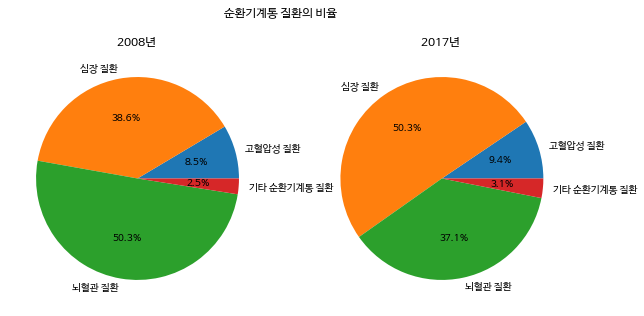

In [16]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
ax.set_title("2008년 ")
ax.pie(top3_and_other_df["2008"],labels=["고혈압성 질환","심장 질환","뇌혈관 질환","기타 순환기계통 질환"],
       autopct="%1.1f%%")  # 2008년도의 데이터를 사용한 pie chart

ax = fig.add_subplot(122)
ax.set_title("2017년 ")
ax.pie(top3_and_other_df["2017"],labels=["고혈압성 질환","심장 질환","뇌혈관 질환","기타 순환기계통 질환"],
       autopct="%1.1f%%")  # 2017년도의 데이터를 사용한 pie chart

plt.suptitle("순환기계통 질환의 비율")
plt.show()

뇌혈관 질환이 차지하는 비중은 크게 줄고, 심장 질환이 차지하는 비율이 크게 증가하였습니다. 

이 외에 암에 따른 사망 추이를 한 번 살펴보겠습니다.

### 예제 3) 암에 따른 사망 추이
암에 의한 사망 중 가장 큰 비중을 차지하는 세가지는 아래와 같이, 위암, 간암, 폐암이 있습니다.

+ 세가지 암(위암, 간암, 폐암)의 사망률을 시간적 흐름에 따라 추세를 확인해 보겠습니다.<br>
> ( 카테고리는 \[신생물 > - 각종 암 > (\*위암, \*간암, \*폐암\)] 으로 구성되어있습니다.)


<br>

|   |2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 |
|---|---|---|---|---|---|---|---|---|---|---|
|- 각종 암|139.5|140.5|144.4|142.8|146.5|149.0|150.9|150.8|153.0|153.9|
|\* 위암| 20.9|20.4|20.1|19.4|18.6|18.2|17.6|16.7|16.2|15.7 |
|\* 간암| 22.9|22.6|22.5|21.8|22.5|22.6|22.8|22.2|21.5|20.9 |
|\* 폐암| 29.9|30. |31.3|31.7|33.1|34. |34.4|34.1|35.1|35.1 |

+ 가장 먼저, 위암, 간암, 폐암의 데이터만 추출해보겠습니다.

In [17]:
cancer_df = df.iloc[2:6]

+ 지금은 각 행 별로 시간에 따른 조사망률이 표현되어 있습니다. 
+ 시간에 따른 각 암의 종류별 사망률에 대해 plot을 하기 위해서는 행과 열을 바꾸어 주어야 합니다.

> 행 : 암의 종류 → 각 연도 분류<br>
> 열 : 각 연도 분류 → 암의 종류

In [18]:
t_cancer_df = cancer_df.T 

각 암별 사망률의 비교 및 시간적 추세를 확인하기 위해서는 꺽은선 그래프가 유용합니다.

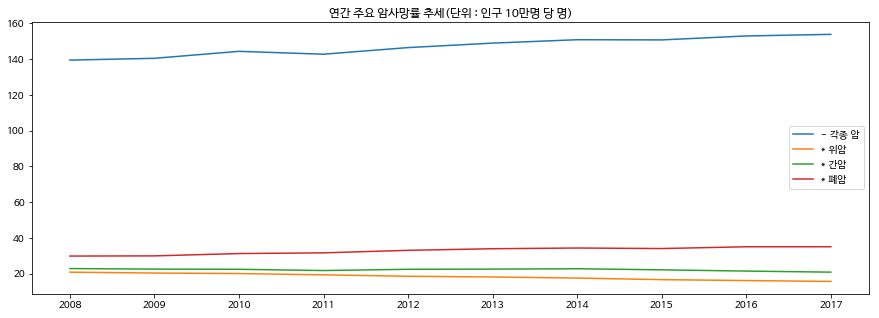

In [19]:
t_cancer_df.plot(
          title="연간 주요 암사망률 추세(단위 : 인구 10만명 당 명)",
          xticks=np.arange(len(df.columns)),
          figsize=(15,5))
plt.show()

폐암의 사망률은 꾸준히 증가하고 있지만 위암, 간암은 줄어들고 있습니다. <br>
주요 3대 암의 질환과 그 외 암의 추세를 함께 확인해 보겠습니다.
<br>
+ "암의 총 사망률", " 3대 암의 사망률", "기타 암의 사망률"을 각 항목으로 하여 시각화해보겠습니다.
+ 각 항목으로 데이터를 구성하기 위해 `np.stack()`을 사용합니다.

In [20]:
cancer_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
- 각종 암,139.5,140.5,144.4,142.8,146.5,149.0,150.9,150.8,153.0,153.9
* 위암,20.9,20.4,20.1,19.4,18.6,18.2,17.6,16.7,16.2,15.7
* 간암,22.9,22.6,22.5,21.8,22.5,22.6,22.8,22.2,21.5,20.9
* 폐암,29.9,30.0,31.3,31.7,33.1,34.0,34.4,34.1,35.1,35.1


In [21]:
total_cancer = cancer_df.iloc[0]                    # "암의 총 사망률"
top3_cancer = cancer_df.iloc[1:].sum(axis=0)       # "3대 암의 사망률"
other_cancer = total_cancer - top3_cancer # "기타 암들의 사망률"

top3_cancer.name = "3대암"
other_cancer.name = "기타암"
cancers = pd.concat([total_cancer,top3_cancer,other_cancer],axis=1)
cancers

,- 각종 암,3대암,기타암
2008,139.5,73.7,65.8
2009,140.5,73.0,67.5
2010,144.4,73.9,70.5
2011,142.8,72.9,69.9
2012,146.5,74.2,72.3
2013,149.0,74.8,74.2
2014,150.9,74.8,76.1
2015,150.8,73.0,77.8
2016,153.0,72.8,80.2
2017,153.9,71.7,82.2



+ 각 항목의 비교 및 시간적 추세를 확인하기 위해서는 꺽은선 그래프가 유용합니다.

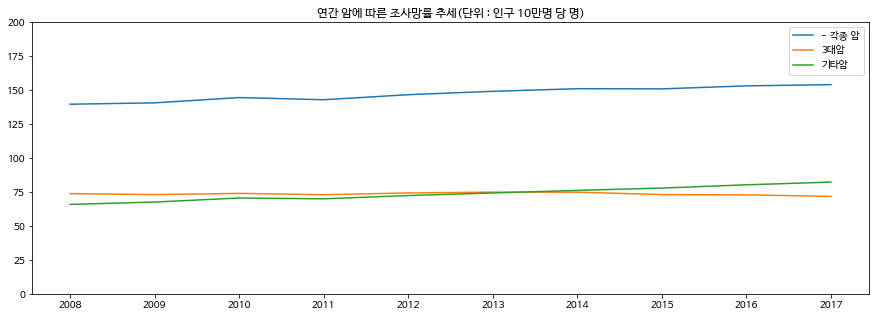

In [22]:
cancers.plot(
          title="연간 암에 따른 조사망률 추세(단위 : 인구 10만명 당 명)",
          xticks=np.arange(len(df.columns)),
          ylim=(0,200),
          figsize=(15,5))
plt.show()

+ 3대 암의 사망률은 조금씩 떨어지고 있지만, 그 외 암들은 꾸준히 증가하고 있습니다.
+ 암으로 인한 사망자가 꾸준히 증가하는 원인에 대한 인사이트를 얻을 수 있습니다.

<br>

### 예제 4) 2008년 대비 2017년 가파르게 상승한 주요 사망원인 파악

2008년과 2017년의 사망원인 별 조사망률은 아래와 같습니다. <br>

가파르게 성장한 사망원인을 파악해 보기 위해 2008년 대비 2017년의 조사망률의 증감률을 비교해보겠습니다.

|사망원인|2008년|2017년|
|---|---|----|
|전체|498.2|557.3|
|신생물|141.4|156.8|
|- 각종 암|139.5|153.9|
|* 위암|20.9|15.7|
|* 간암|22.9|20.9|
|* 폐암|29.9|35.1|
|내분비 및 대사성질환|22.4|20.6|
|- 당뇨병|20.7|17.9|
|순환기계통의 질환|112.3|119.6|
|- 고혈압성 질환|9.6|11.3|
|- 심장 질환|43.4|60.2|
|- 뇌혈관 질환|56.5|44.4|
|호흡기계통의 질환|32.4|63.7|
|- 폐렴|11.1|37.8|
|- 만성하기도 질환|14.9|13.2|
|소화기계통의 질환|21.8|23.7|
|- 간 질환|14.5|13.3|
|사망의 외부요인|61.7|53.0|
|- 운수사고|14.7|9.8|
|- 자살|26.0|24.3|

In [23]:
diffs = (df["2017"]-df["2008"])/df["2008"] * 100 # 2008년 사망률 대비 2017년 사망률에 대한 증감률 계산
diffs

전체              11.862706
신생물             10.891089
- 각종 암          10.322581
* 위암           -24.880383
* 간암            -8.733624
* 폐암            17.391304
내분비 및 대사성질환     -8.035714
- 당뇨병          -13.526570
순환기계통의 질환        6.500445
- 고혈압성 질환       17.708333
- 심장 질환         38.709677
- 뇌혈관 질환       -21.415929
호흡기계통의 질환       96.604938
- 폐렴           240.540541
- 만성하기도 질환     -11.409396
소화기계통의 질환        8.715596
- 간 질환          -8.275862
사망의 외부요인       -14.100486
- 운수사고         -33.333333
- 자살            -6.538462
dtype: float64

* 이에 따라, 계산된 증감률 결과는 다음 표와 같습니다.



|사망원인|2008년|2017년| 증감률(%) |
|---|---|----|
|전체|498.2|557.3|11.86%|
|신생물|141.4|156.8|10.89%|
|- 각종 암|139.5|153.9|10.32%|
|* 위암|20.9|15.7|-24.88%|
|* 간암|22.9|20.9|-8.73%|
|* 폐암|29.9|35.1|17.39%|
|내분비 및 대사성질환|22.4|20.6|-8.04%|
|- 당뇨병|20.7|17.9|-13.53%|
|순환기계통의 질환|112.3|119.6|6.50%|
|- 고혈압성 질환|9.6|11.3|17.71%|
|- 심장 질환|43.4|60.2|38.71%|
|- 뇌혈관 질환|56.5|44.4|-21.42%|
|호흡기계통의 질환|32.4|63.7|96.60%|
|- 폐렴|11.1|37.8|240.54%|
|- 만성하기도 질환|14.9|13.2|-11.41%|
|소화기계통의 질환|21.8|23.7|8.72%|
|- 간 질환|14.5|13.3|-8.28%|
|사망의 외부요인|61.7|53.0|-14.10%|
|- 운수사고|14.7|9.8|-33.33%|
|- 자살|26.0|24.3|-6.54%|

+ 증감률 비교와같이 각 항목별로 그 값의 크기를 서로 비교할때에는 막대그래프(bar chart)가 유용합니다.

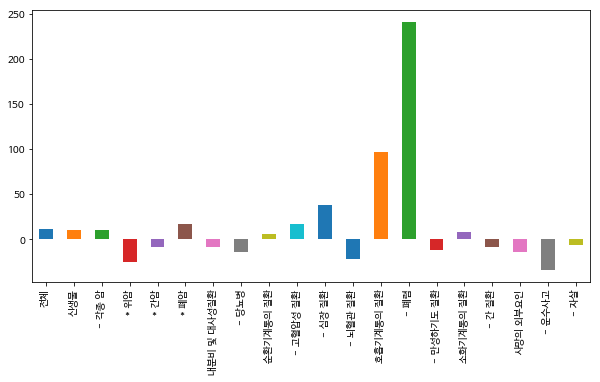

In [24]:
plt.figure(figsize=(10,5))
diffs.plot(kind='bar')
plt.show()

위의 그래프로부터 얻을 수 있는 인사이트로는

* 위암과 운수사고는 크게 떨어졌습니다.
* 호흡기계통의 질환 및 폐렴은 역으로 크게 증가하였습니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/07

---